In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thakshakarathnayake
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 16.1MB/s]

In [4]:
data = pd.read_csv("random-linear-regression/test.csv")

In [5]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
data.shape

(300, 2)

In [7]:
x = data['x']
y = data['y']

In [8]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [9]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


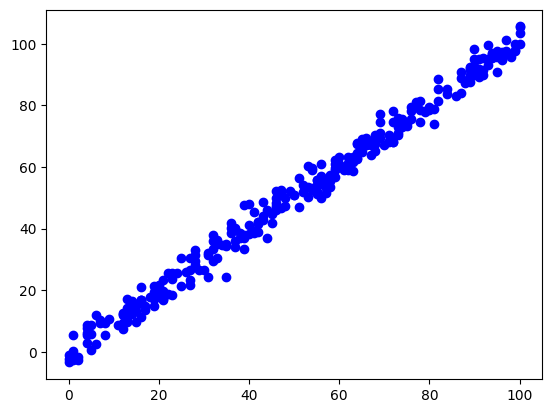

In [10]:
plt.scatter(x, y, c='b')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train.shape, x_test.shape

((240,), (60,))

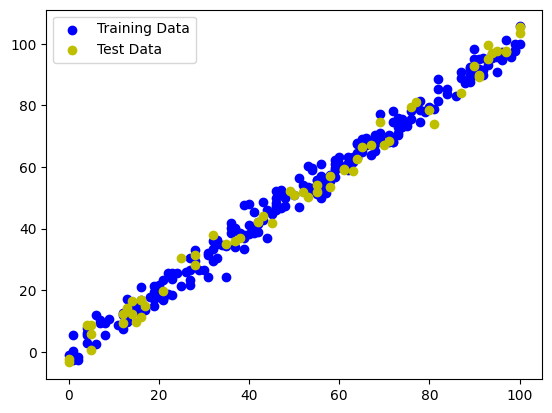

In [13]:
plt.scatter(x_train, y_train, c='b', label='Training Data')
plt.scatter(x_test, y_test, c='y', label='Test Data')
plt.legend()
plt.show()

# Model Building

In [17]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(1,)), # Hidden layer and Input layer
    tf.keras.layers.Dense(1) # Output layer
])

# Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Train model
epoch_number = 4
model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=epoch_number)

Epoch 1/4


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43.7507 - mae: 43.7507  
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.9979 - mae: 31.9979 
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.4148 - mae: 27.4148 
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.7331 - mae: 24.7331 


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [21]:
y_predictions = model.predict(x_test)
y_predictions[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[173.22032 ],
       [146.28752 ],
       [180.91542 ],
       [  9.699693],
       [175.14409 ]], dtype=float32)

In [23]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


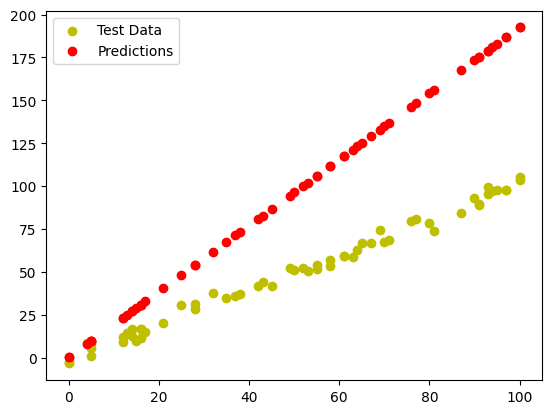

In [25]:
plt.scatter(x_test, y_test, c='y', label='Test Data')
plt.scatter(x_test, y_predictions, c='r', label='Predictions')
plt.legend()
plt.show()

# Evaluate Model

In [56]:
# Using evaluate method
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.5482 - mae: 2.5482


[2.511969566345215, 2.511969566345215]

# Improve the Model

In [50]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)), # Update # of neurons in the first hidden layer
    tf.keras.layers.Dense(10), # Add 1 more layer as the second hidden layer
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05), # Update the optimizer
              metrics = ['mae'])

# Train model
epoch_number = 10 # Increase the # of epochs
history = model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 42.4556 - mae: 42.4556  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4222 - mae: 4.4222 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8273 - mae: 3.8273 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2848 - mae: 4.2848 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1116 - mae: 3.1116 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4268 - mae: 3.4268 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7424 - mae: 3.7424 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7435 - mae: 2.7435 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4752 - mae: 2.4752 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4187 - mae: 2.4187 


In [45]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [46]:
y_predictions = model.predict(x_test)
y_predictions[:5]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[90.49828 ],
       [76.39094 ],
       [94.52896 ],
       [ 4.846416],
       [91.50596 ]], dtype=float32)

In [47]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


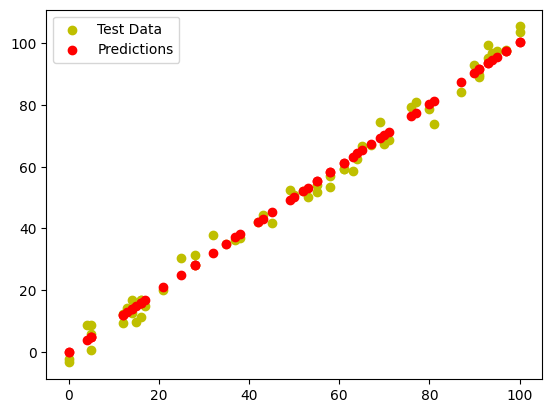

In [48]:
plt.scatter(x_test, y_test, c='y', label='Test Data')
plt.scatter(x_test, y_predictions, c='r', label='Predictions')
plt.legend()
plt.show()

# Evaluate the Improved Model

In [49]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5582 - mae: 2.5582 


[2.5050196647644043, 2.5050196647644043]

In [52]:
history.history

{'loss': [30.398113250732422,
  4.215177536010742,
  3.5916330814361572,
  3.8679611682891846,
  2.9944958686828613,
  3.7785322666168213,
  3.617084503173828,
  2.660231351852417,
  2.6438558101654053,
  2.4610090255737305],
 'mae': [30.398113250732422,
  4.215177536010742,
  3.5916330814361572,
  3.8679611682891846,
  2.9944958686828613,
  3.7785322666168213,
  3.617084503173828,
  2.660231351852417,
  2.6438558101654053,
  2.4610090255737305]}

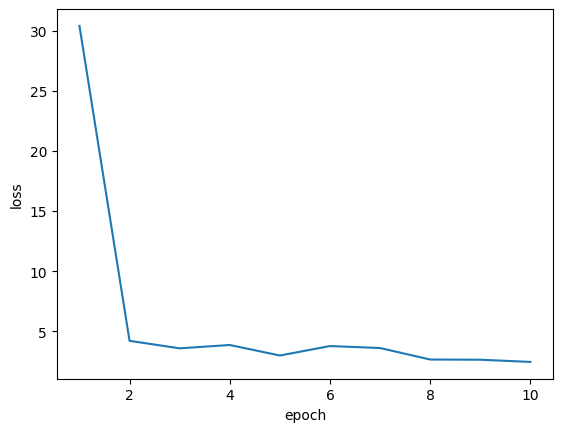

In [53]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Weights & Biases of the Improved Model

In [54]:
# Finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-5.8835084e-03  3.8205091e-02 -5.8106452e-02  6.1402516e-04
   1.0819572e-01  1.4979236e-01  2.1464666e-02 -8.2881384e-02
  -3.6614995e-02  1.8631654e-02  1.0426796e-02 -1.3771683e-01
   9.3503028e-02 -1.0841422e-01  5.4398719e-03 -5.5915839e-03
  -1.0102812e-02  2.3790099e-02  7.9614669e-03 -1.7262481e-02
   2.7637744e-01 -5.5923285e-03  4.2513296e-02  7.0908800e-02
   3.6256611e-03  5.8954086e-02  1.6537714e-01 -7.9450592e-02
  -2.5318962e-01 -9.3992278e-03  2.4710852e-03  2.1022316e-03
   2.3952107e-01  4.3257135e-03 -1.0571849e-02  3.0430162e-03
   3.5195924e-02  1.0714350e-02  3.0004926e-04 -2.0111665e-02
   5.9580854e-03 -2.1037051e-02  1.6176488e-01 -1.2168537e-03
  -8.2800891e-03 -1.9636998e-01  5.3050324e-02  8.0966309e-02
   1.2915072e-02  9.1202753e-03  1.6975375e-02  4.0925778e-02
   2.8888378e-01  2.9574905e-04  4.6428360e-04 -2.1098283e-01
  -4.7679301e-03 -5.7753888e-03 -8.8580407e-02 -1.6969748e-01
   3.1536123e-01  3.0545628e-01  2.6680806e-03 -2.2237103e-